분산분석의 3단계
1. 등분산분석
2. 분산분석
3. 사후분석

1. 등분산 분석  
여러 그룹의 분산이 같은가를 확인 > 가설 검정 방법대로 귀무가설 정의 : 모든 그룹의 분산은 같다.  
유의수준 0.05와 p-value 비교  
p-value가 유의수준 0.05보다 같거나 크면 **귀무가설 기각 불가**  
p-value가 유의수준 0.05보다 작으면 **귀무가설 기각**  

귀무가설 기각 = 모든 그룹의 분산이 같은 것은 아니다.  

등분산임을 가정할 수 있으면 분산분석 가능, 그렇지 않으면 다른 방법으로 수행

2. 분산분석  
귀무가설 : 모든 그룹의 평균은 같다.  
대립가설 : 어떤 그룹의 평균은 같지 않다.  

p-value가 유의수준보다 같거나 크면 귀무가설 기각 불가  
p-value가 유의수준보다 작으면 귀무가설 기각 

귀무가설 기각 시  
어떤 그룹의 평균이 같은지는 알 수 없기 때문에 사후검정이 필요

3. 사후분석  
그룹 별 평균을 비교해 평균이 같은 그룹과 다른 그룹을 구분하여 알려줌

### Bartlett`s Test (등분산 분석)

In [2]:
import pandas as pd

bike_data = pd.read_csv('bike_usage_0.csv', encoding = 'ANSI')
stations = pd.read_csv('stations.csv')

bike_data.loc[bike_data.Gender.isnull(), 'Gender'] = 'U'

bike_data2 = pd.merge(bike_data, stations, left_on = 'Station_no_out', right_on = 'ID')
bike_data2 = bike_data2[bike_data2.Distance != 0]

bike_data2.to_csv('bike_data2.csv', encoding = 'utf-8-sig', index = False)

y_gu = bike_data2[bike_data2.Gu == '영등포구']
m_gu = bike_data2[bike_data2.Gu == '마포구']

In [2]:
s_gu = bike_data2[bike_data2.Gu == '서초구']
d_gu = bike_data2[bike_data2.Gu == '동대문구']
e_gu = bike_data2[bike_data2.Gu == '은평구']

In [3]:
from scipy import stats

stats.bartlett(y_gu.Distance, m_gu.Distance, s_gu.Distance, d_gu.Distance, e_gu.Distance)

BartlettResult(statistic=405.99591324805436, pvalue=1.4084240027307602e-86)

p-value가 유의수준 0.05보다 작으므로 귀무가설 기각  

= 모든 그룹이 등분산은 아니다

등분산이 나오지 않는다면  
1. 비모수적 방법 사용 : 평균, 분산, 표준편차 등 통계량에 근거한 추론 방법을 사용하지 않는 것
2. 데이터에 보완할 점 검토 : 데이터가 충분하지 않은 경우

> 실습을 위해 등분산이라 가정하고 분산분석 실시

### 분산분석 : One Way ANOVA

In [4]:
stats.f_oneway(y_gu.Distance, m_gu.Distance, s_gu.Distance, d_gu.Distance, e_gu.Distance)

F_onewayResult(statistic=37.75546101206967, pvalue=1.4366160740892166e-31)

귀무가설 : 모든 그룹의 평균은 같다  
p-value가 유의수준 0.05보다 작으므로 귀무가설 기각  

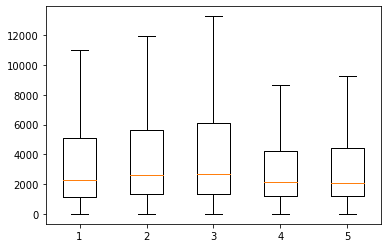

In [9]:
import matplotlib.pyplot as plt

plot_data = [y_gu.Distance, m_gu.Distance, s_gu.Distance, d_gu.Distance, e_gu.Distance]
plt.boxplot(plot_data, showfliers = False)
plt.show()

### 사후 분석 : Tukey`s HSD Test

Tukey`s HSD (Honestly Significant Difference)  
평균이 같은 그룹과 다른 그룹을 나누어 볼 수 있는 방법 중 하나  
statsmodels 패키지가 필요한 함수

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

hsd = pairwise_tukeyhsd(bike_data2.Distance, bike_data2.Gu)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
동대문구,마포구,793.049,0.001,515.079,1071.019,True
동대문구,서초구,1210.5524,0.001,913.0775,1508.0272,True
동대문구,영등포구,468.901,0.001,195.2948,742.5072,True
동대문구,은평구,351.3685,0.0249,28.5165,674.2204,True
마포구,서초구,417.5033,0.001,165.2287,669.778,True
마포구,영등포구,-324.1481,0.001,-547.7807,-100.5154,True
마포구,은평구,-441.6805,0.001,-723.4333,-159.9278,True
서초구,영등포구,-741.6514,0.001,-989.1095,-494.1933,True
서초구,은평구,-859.1839,0.001,-1160.1964,-558.1714,True
영등포구,은평구,-117.5325,0.7495,-394.9809,159.9159,False


5개 구의 이동거리 평균은 영등포구와 은평구만 통계적으로 같고 나머지는 같지 않다